# Outliers

An outlier is a value that is far away from a data distribution. It's a extreme value and I like to think of an outlier as a value that doesn't represent the overall data. It doesn't mean that an outlier is always wrong or not part of the data as we're gonna see, but in general, an outlier should be dealt with and not simply ignored.

**Why do outliers exist?**

There isn't one reason that justifies the existence of outliers. They might be noisy data, human error, for example, when entering the data somedoby made a mistake. It can also be natural variation, for example, in Biology this is quite common. Sometimes outliers should be considered in the analysis. It always depends on the conclusions you want to reach and it's also important to investigate outliers case by case.

**Why should we pay attention to outliers?**

- There are a lot of statistical methods that assume an approximate Gaussian (Normal) distribution and they rely on measures of central tendency. Outliers tend to affect these measures heavily so this might also affect the desired statistical conclusions.
- There are also analysis that work with squared data (Variance, ANOVA, Pearson correlation, etc.) and the existence of outliers will make the values become really large.
- Outliers have a great impact on small datasets

Don't ignore outliers. Investigate. Once outliers are found, try to understand if it makes sense to remove them and if so, what technique you're gonna use for removing them. More on that later.

Let's first visualize outliers so it's easier to understand their impact.
Imagine that we have a dataset representing all the salaries for a team of engineers in a startup and you want to calculate the average salary of this team so you can adjust future salary offers for new team members.

The average salary is: 4960.0


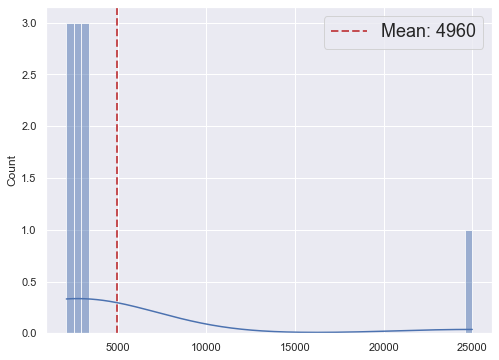

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
sns.set()
np.random.seed(42)

salaries = [3000, 2500, 2300, 2900, 3200, 2900, 3000, 2700, 2100, 25000]
mean = np.mean(salaries)
fig, ax = plt.subplots(figsize=(8,6))

sns.histplot(salaries, ax=ax, kde=True);
ax.axvline(mean, color='r', linestyle='dashed', linewidth=2, label=f"Mean: {int(mean)}")
ax.legend(fontsize=18)
print(f"The average salary is: {mean}")

Here you can see that most of the salaries fall within the range from 2100 to 3200, but there is one extreme high salary (25000) that pulls the mean to 4960. Would it be fair to say that the engineers in this team earn approximately 4960 dollars per month? Probably not. All the statistical analyses and methods that could be used and depend on measures of central tendency would be also affected by this one outlier. Now, what do we do? Is this high salary an error? Did somebody made a mistake when entering the value? I don't know. It depends on the scenario and the conclusions you want to reach, but here you can have an idea of what an outlier is and the impact it can have on the data.

Now let's see some techniques for identifying and removing outliers.


## Z-score method

The Z-score method assumes that the distribution is roughly Normal and it identifies values that are above or below a specified threshold. As already discussed (see linked post) the Z-score units are measured in standard deviations from the mean so we try to identify values that are outside a certain standard deviation threshold. Here is the process:

1. Convert the data to Z-scores
2. Establish a threshold to cut-off outliers. There is no right threshold. It depends on your purpose. Usually you're gonna see the threshold between 2 and 3 standard deviations. I'll use 2.5 here.
3. Remove the values that fall off the threshold
4. Do the same process again until no more outliers are identified


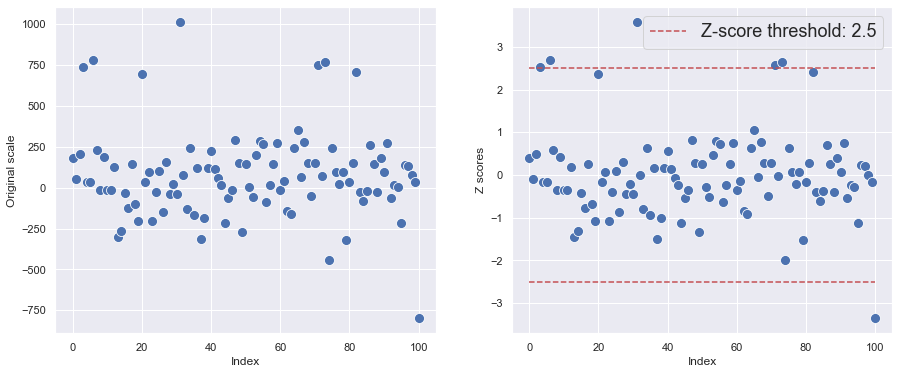

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
sns.set()
np.random.seed(42)

# Z-score method - one of the most common ways

N = 100
data = np.random.normal(0, 1, N) 

# Adding some outliers
data[data < 2.6] = data[data < 2.6] + 0.4
data[data > 1.8] = data[data > 1.8] ** 2
data = np.append(data, -4)

# Scaling the distribution
data = data * 200

zScores = stats.zscore(data)
zScoreThreshold = 2.5

fig, (ax0,ax1) = plt.subplots(1,2, figsize=(15,6))

sns.scatterplot(x=range(data.size), y=data, ax=ax0, s=100)
ax0.set_xlabel("Index")
ax0.set_ylabel("Original scale")

sns.scatterplot(x=range(zScores.size), y=zScores, ax=ax1, s=100)
ax1.plot([0,N], [zScoreThreshold, zScoreThreshold],'r--', label=f"Z-score threshold: {zScoreThreshold}");
ax1.plot([0,N], [-zScoreThreshold, -zScoreThreshold],'r--');
ax1.legend(fontsize=18)

ax1.set_xlabel("Index")
ax1.set_ylabel("Z scores");



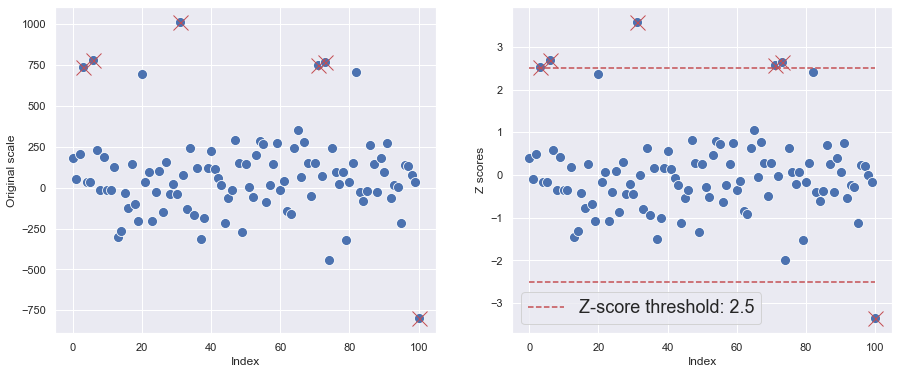

In [3]:
outliers = np.where(abs(zScores) > zScoreThreshold)[0]
ax0.plot(outliers, data[outliers], 'x', color='r', markersize=15);
ax1.plot(outliers, zScores[outliers], 'x', color='r', markersize=15)
fig

Now that we have identified the outliers we can proceed to remove them, if this is a good choice in the data we're working with. Let's assume here it's gonna be a good choice. We can now remove the outliers and perform the same steps again and again until there are no outliers anymore.

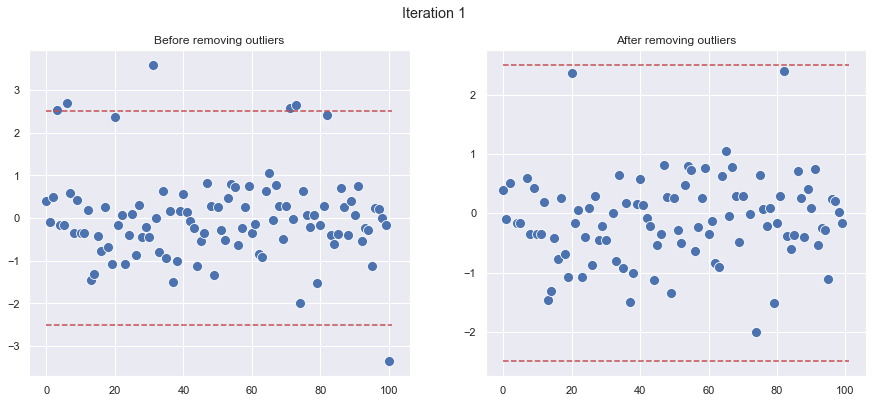

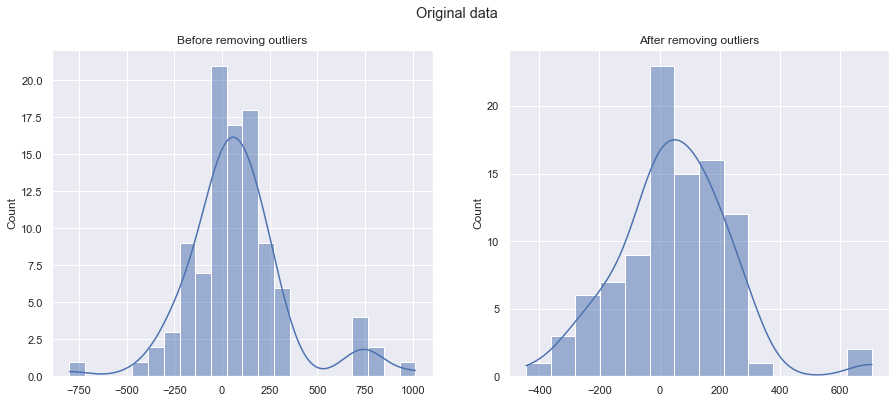

In [23]:
def remove_outliers(data, z_score_threshold):
    data_without_outliers = data
    z_scores = stats.zscore(data)
    iteration = 0

    while True:
        outliers = np.abs(z_scores) > z_score_threshold
        
        if sum(outliers) == 0:
            break
        else:
            data_without_outliers = data[~outliers]
            fig, (ax0,ax1) = plt.subplots(1,2, figsize=(15,6))
            fig.suptitle(f"Iteration {iteration + 1}")
    
            # Before removing outliers
            sns.scatterplot(x=range(z_scores.size), y=z_scores, ax=ax0, s=100)
            ax0.set_title("Before removing outliers")
            ax0.plot([0,data.size], [z_score_threshold, z_score_threshold],'r--');
            ax0.plot([0,data.size], [-z_score_threshold, -z_score_threshold],'r--');
            
        
            # After removing outliers
            z_scores[outliers] = np.nan
            sns.scatterplot(x=range(z_scores.size), y=z_scores, ax=ax1, s=100)
            ax1.set_title("After removing outliers")
            ax1.plot([0,data.size], [z_score_threshold, z_score_threshold],'r--');
            ax1.plot([0,data.size], [-z_score_threshold, -z_score_threshold],'r--');
            
            iteration += 1
    
    return data_without_outliers
                      
data_without_outliers = remove_outliers(data, zScoreThreshold)   

fig, (ax0,ax1) = plt.subplots(1,2, figsize=(15,6))
fig.suptitle("Original data")
sns.histplot(data, ax=ax0, kde=True)
ax0.set_title("Before removing outliers")

sns.histplot(data_without_outliers, ax=ax1, kde=True)
ax1.set_title("After removing outliers");
        

We could even go further and decrease the threshold if we want.

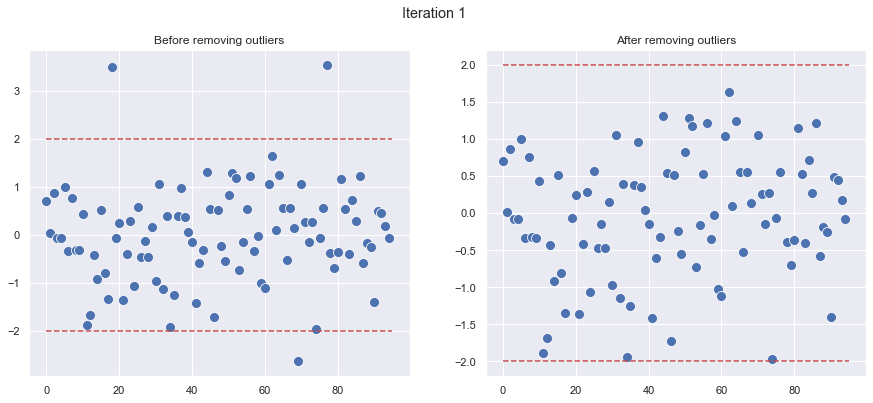

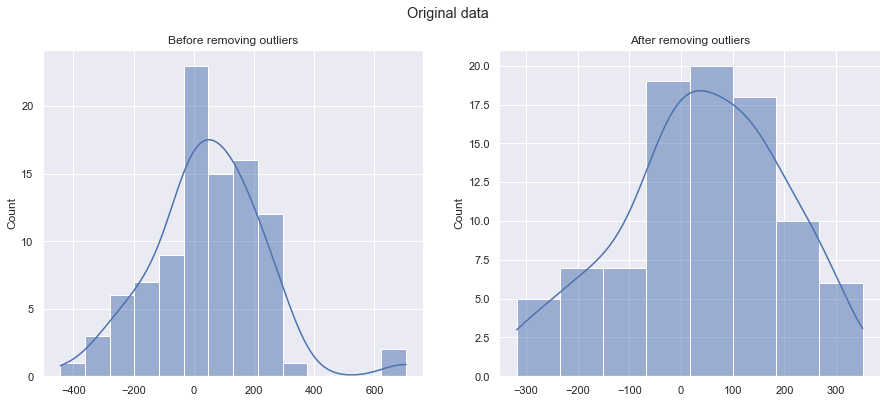

In [27]:
data_without_outliers_2 = remove_outliers(data_without_outliers, 2)   

fig, (ax0,ax1) = plt.subplots(1,2, figsize=(15,6))
fig.suptitle("Original data")
sns.histplot(data_without_outliers, ax=ax0, kde=True)
ax0.set_title("Before removing outliers")

sns.histplot(data_without_outliers_2, ax=ax1, kde=True)
ax1.set_title("After removing outliers");

## Modified Z-score method

This method is similar to the Z-score method, but it can be used for distributions that are **not** roughly normal, e. g., log-normal. The only difference is that we replace the Z-score which we've been using by the modified Z-score that uses the MAD (Median Absolute Deviation) that is not so sensitive to ouliers like the mean:

$$ \operatorname{MAD} = \operatorname{median}( |X_i - \tilde{X}|) $$ 

The formula then for calculating the modified Z-score is:

$$ z = {.6745(x- \tilde{x}) \over \operatorname{MAD}} $$

where:

1. .6745 is the z-score for 75% of the data in a perfectly standard Normal distribution. The purpose is to make modified Z-scores more close to standard Z-scores
2. $ \tilde{x}$ is the median of the sample

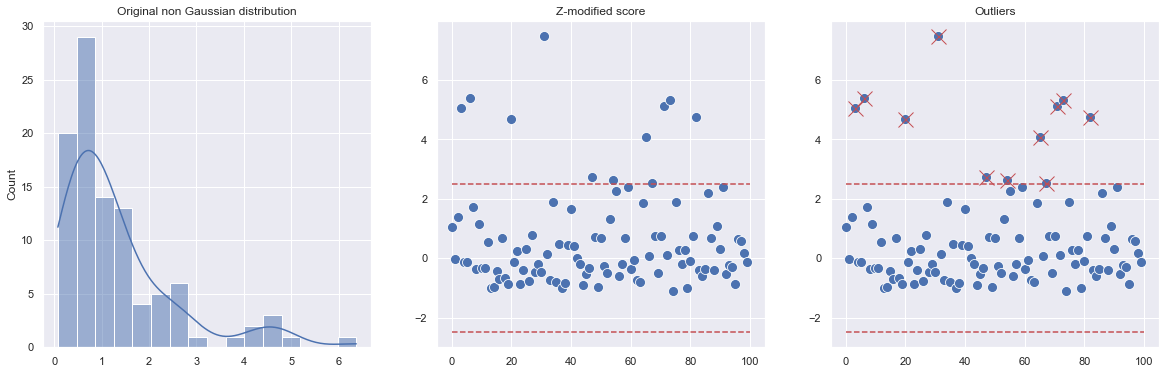

In [56]:
# Z-modified score for non normal distributions
np.random.seed(42)
N = 100
z_score_threshold = 2.5
data = np.random.lognormal(0, 1, N)
median = np.median(data)
mad = stats.median_abs_deviation(data)

z_modified_score = stats.norm.ppf(.75) * (data - median) / mad

fig, ax = plt.subplots(1,3,figsize=(20,6))
ax[0].set_title("Original non Gaussian distribution")
sns.histplot(data, ax=ax[0], kde=True);


sns.scatterplot(x=range(z_modified_score.size), y=z_modified_score, ax=ax[1], s=100)
ax[1].set_title("Z-modified score")
ax[1].plot([0,data.size], [z_score_threshold, z_score_threshold],'r--');
ax[1].plot([0,data.size], [-z_score_threshold, -z_score_threshold],'r--');

outliers = np.where(abs(z_modified_score) > z_score_threshold)[0]
sns.scatterplot(x=range(z_modified_score.size), y=z_modified_score, ax=ax[2], s=100)
ax[2].set_title("Outliers")
ax[2].plot([0,data.size], [z_score_threshold, z_score_threshold],'r--');
ax[2].plot([0,data.size], [-z_score_threshold, -z_score_threshold],'r--');
ax[2].plot(outliers, z_modified_score[outliers], 'x', color='r', markersize=15);

Now we could use a similar approach like we did for the Z-score to remove the outliers (if they are meant to be removed):

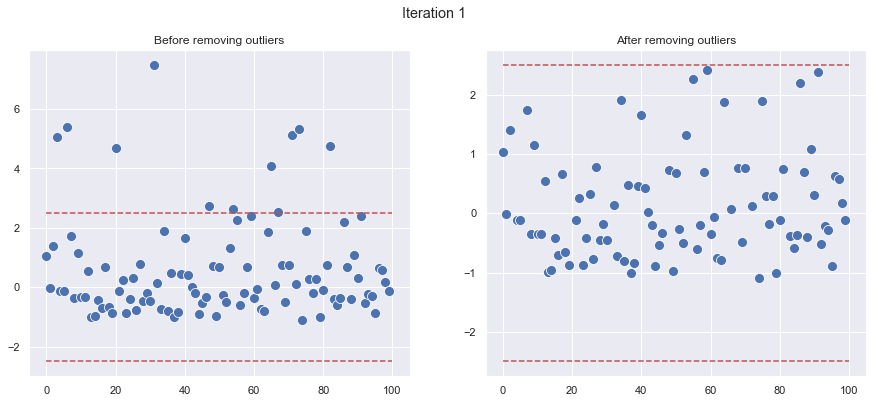

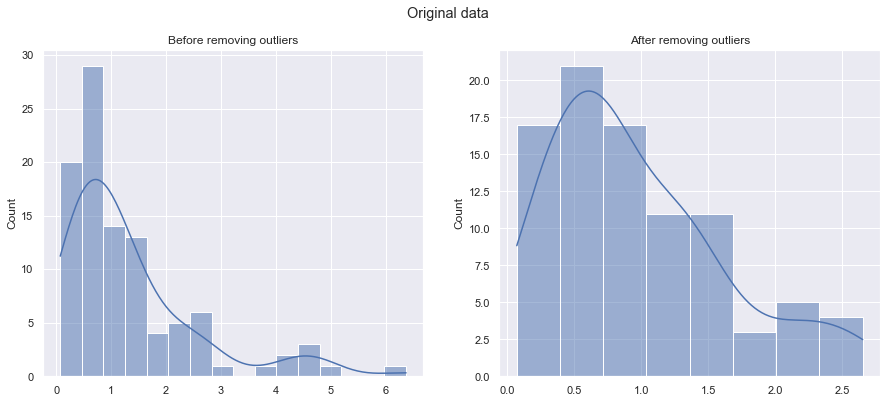

In [60]:
def remove_outliers_z_modified_score(data, z_score_threshold):
    data_without_outliers = data
    median = np.median(data)
    mad = stats.median_abs_deviation(data)

    z_modified_scores = stats.norm.ppf(.75) * (data - median) / mad
    iteration = 0

    while True:
        outliers = np.abs(z_modified_scores) > z_score_threshold
        
        if sum(outliers) == 0:
            break
        else:
            data_without_outliers = data[~outliers]
            fig, (ax0,ax1) = plt.subplots(1,2, figsize=(15,6))
            fig.suptitle(f"Iteration {iteration + 1}")
    
            # Before removing outliers
            sns.scatterplot(x=range(z_modified_scores.size), y=z_modified_scores, ax=ax0, s=100)
            ax0.set_title("Before removing outliers")
            ax0.plot([0,data.size], [z_score_threshold, z_score_threshold],'r--');
            ax0.plot([0,data.size], [-z_score_threshold, -z_score_threshold],'r--');
            
        
            # After removing outliers
            z_modified_scores[outliers] = np.nan
            sns.scatterplot(x=range(z_modified_scores.size), y=z_modified_scores, ax=ax1, s=100)
            ax1.set_title("After removing outliers")
            ax1.plot([0,data.size], [z_score_threshold, z_score_threshold],'r--');
            ax1.plot([0,data.size], [-z_score_threshold, -z_score_threshold],'r--');
            
            iteration += 1
    
    return data_without_outliers
                      
data_without_outliers = remove_outliers_z_modified_score(data, z_score_threshold)   

fig, (ax0,ax1) = plt.subplots(1,2, figsize=(15,6))
fig.suptitle("Original data")
sns.histplot(data, ax=ax0, kde=True)
ax0.set_title("Before removing outliers")

sns.histplot(data_without_outliers, ax=ax1, kde=True)
ax1.set_title("After removing outliers");
        

## IQR method

This method can be used used to identify outliers by defining limits (outlier thresholds) on the values that are farther away from these limits like we already did, but in order to calculate these boundaries we need the IQR, Q3 and Q1 values and also a factor that we can conclude that when a value is below this factor of the 25th percentile (Q1) or above the 75th percentile (Q3) then it's considered an outlier. A common value for this factor is 1.5, the higher the factor the more extreme outliers we can identify. 

If you want to understand better why 1.5 is a common value [here is a great resource](https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097).

To summarize what I just explained here is the formula:

$$ Lower Bound: (Q1 - 1.5 * IQR) $$ 

$$ Upper Bound: (Q3 + 1.5 * IQR) $$





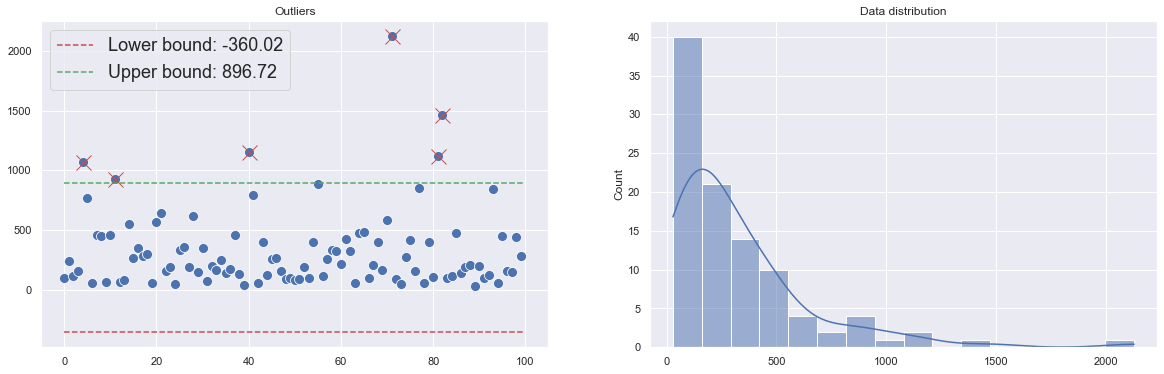

In [87]:
N = 100
data = np.random.lognormal(0, 1, 100) * 200
q1 = np.quantile(data,0.25)
q3 = np.quantile(data,0.75)
iqr = stats.iqr(data)
lower_bound = (q1 - 1.5 * iqr)
upper_bound = (q3 + 1.5 * iqr)
outliers = np.where((data < lower_bound) | (data > upper_bound))[0]

fig, (ax0,ax1) = plt.subplots(1,2,figsize=(20,6))
ax0.set_title("Outliers")
sns.scatterplot(x=range(data.size), y=data, ax=ax0, s=100)
ax0.plot([0,N], [lower_bound, lower_bound],'r--', label=f"Lower bound: {lower_bound.round(2)}");
ax0.plot([0,N], [upper_bound, upper_bound],'g--', label=f"Upper bound: {upper_bound.round(2)}");
ax0.legend(fontsize=18)
ax0.plot(outliers, data[outliers], 'x', color='r', markersize=15);

ax1.set_title("Data distribution")
sns.histplot(data, ax=ax1, kde=True);

Now we can remove the outliers that fall off limits like we already did before.

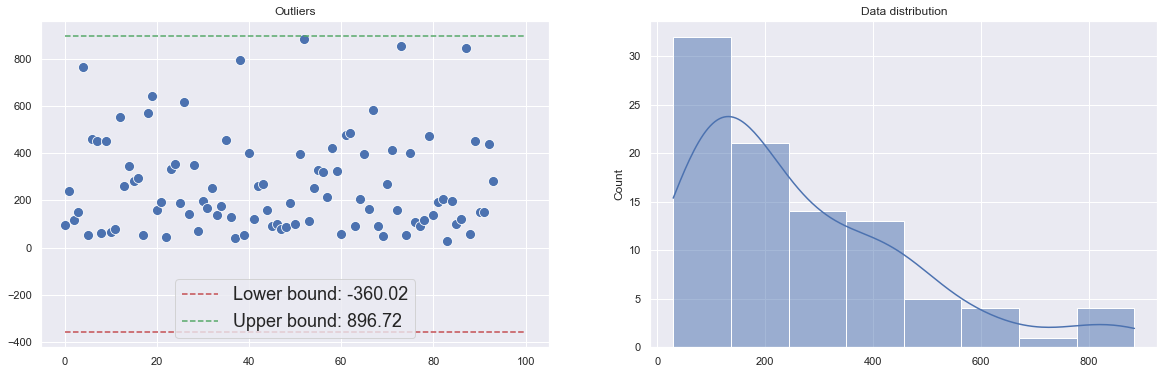

In [94]:
outliers = (data < lower_bound) | (data > upper_bound)
data_without_outliers = data[~outliers]
    
fig, (ax0,ax1) = plt.subplots(1,2,figsize=(20,6))
ax0.set_title("Outliers")
sns.scatterplot(x=range(data_without_outliers.size), y=data_without_outliers, ax=ax0, s=100)
ax0.plot([0,N], [lower_bound, lower_bound],'r--', label=f"Lower bound: {lower_bound.round(2)}");
ax0.plot([0,N], [upper_bound, upper_bound],'g--', label=f"Upper bound: {upper_bound.round(2)}");
ax0.legend(fontsize=18)
ax1.set_title("Data distribution")
sns.histplot(data_without_outliers, ax=ax1, kde=True);

## Multivariate method

Up to now I've been showing how to identify and remove outliers from just one dataset, but what if we want to identify outliers for more than one variable? For example we have two datasets representing two variables and we'd like to draw a regression line or the line of best fit that crosses the plot and best expresses the relationship between those variables, but if we have strong outliers this line can be heavily affected and therefore the relationship conclusions will also be affected. Here are the steps for identifying outliers in scenarios with more than one variable:

- Calculate the mean for each dataset
- Calculate the distance from each point to the mean

In order to calculate the distance between points we can use the Euclidean Distance formula: 

$$ d(a,b) = \sqrt{(a_x-b_x)^2 + (a_y-b_y)^2} $$ 

- Rescale the distances to z-scores
- Remove outliers based on a z-score threshold as already shown

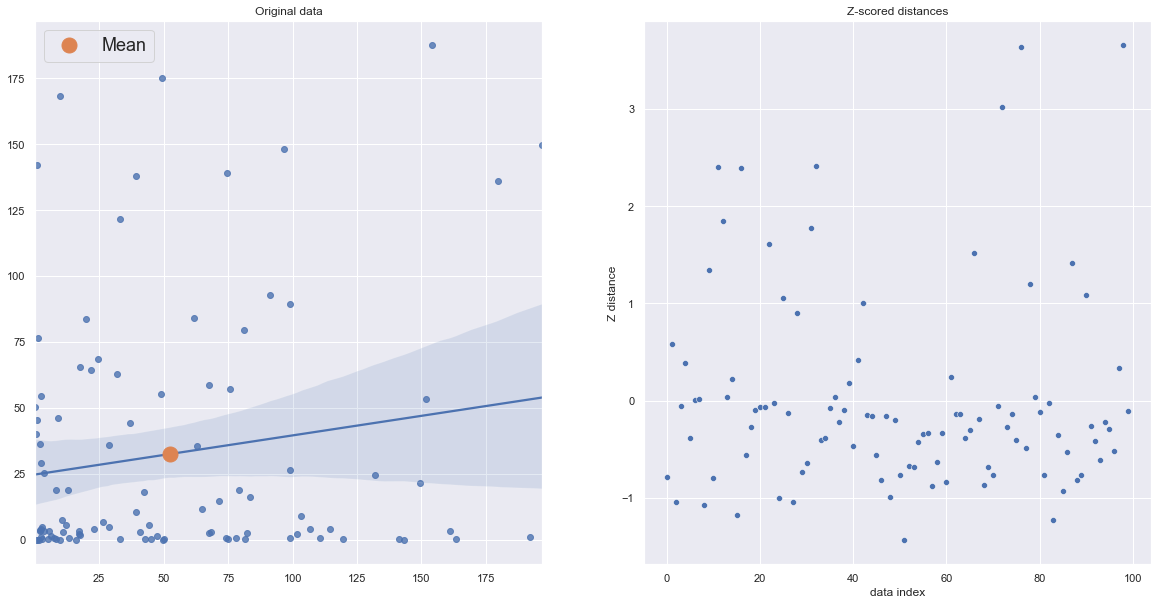

In [116]:
np.random.seed(42)
N = 100

variable1 = np.exp(-abs(np.random.randn(N) * 3)) * 200
variable2 = np.exp(-abs(np.random.randn(N) * 5)) * 200

mean_variable_1 = np.mean(variable1)
mean_variable_2 = np.mean(variable2)

distances = np.zeros(N)

for i in range(N):
    distances[i] = np.sqrt((variable1[i] - mean_variable_1) ** 2 + (variable2[i] - mean_variable_2) ** 2)
    
    
z_scores = stats.zscore(distances)

fig, (ax0, ax1) = plt.subplots(1,2,figsize=(20,10))

sns.regplot(x=variable1, y=variable2, ax=ax0)
ax0.set_title("Original data")
ax0.plot(mean_variable_1, mean_variable_2, 'o', markersize=15, label="Mean")
ax0.legend(fontsize=18)


sns.scatterplot(x=range(z_scores.size), y=z_scores,ax=ax1)
ax1.set_title("Z-scored distances")
ax1.set_xlabel("data index")
ax1.set_ylabel("Z distance");

Now we can establish a z-score threshold as we did for all the other methods and start to identify and remove outliers.

[72 76 98]


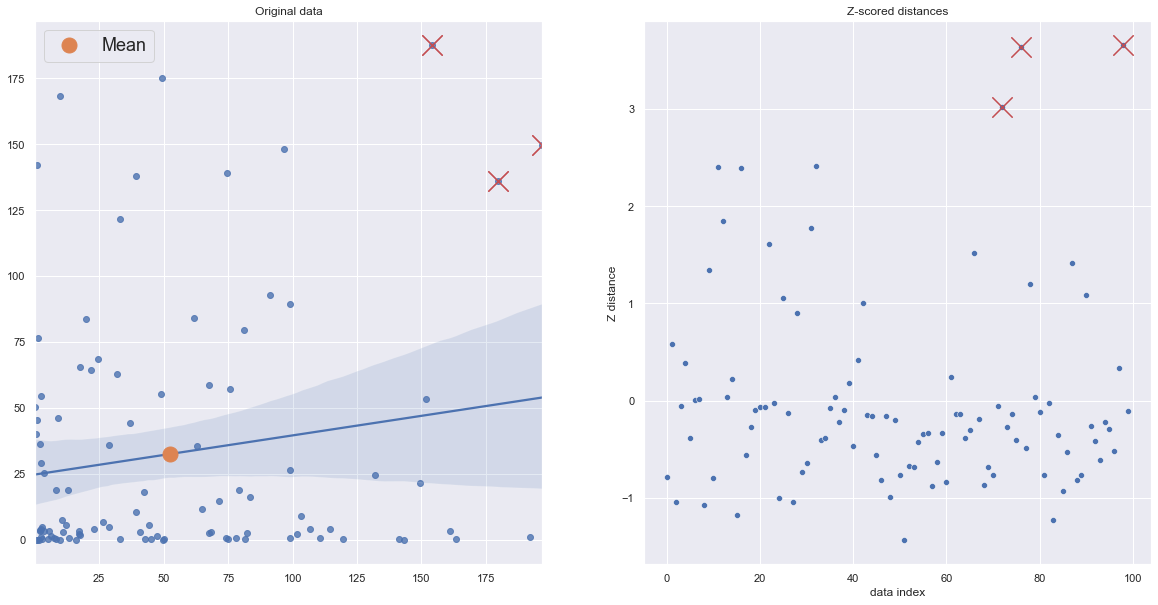

In [120]:
z_score_threshold = 2.5

# Not considering negative values because negative ditances can still be close to the mean and are valid values
outliers = np.where(z_scores > distanceThreshold)[0]

print(outliers)

ax0.plot(variable1[outliers], variable2[outliers], 'x', color='r', markersize=20)
ax1.plot(outliers, z_scores[outliers], 'x', color='r', markersize=20)
fig

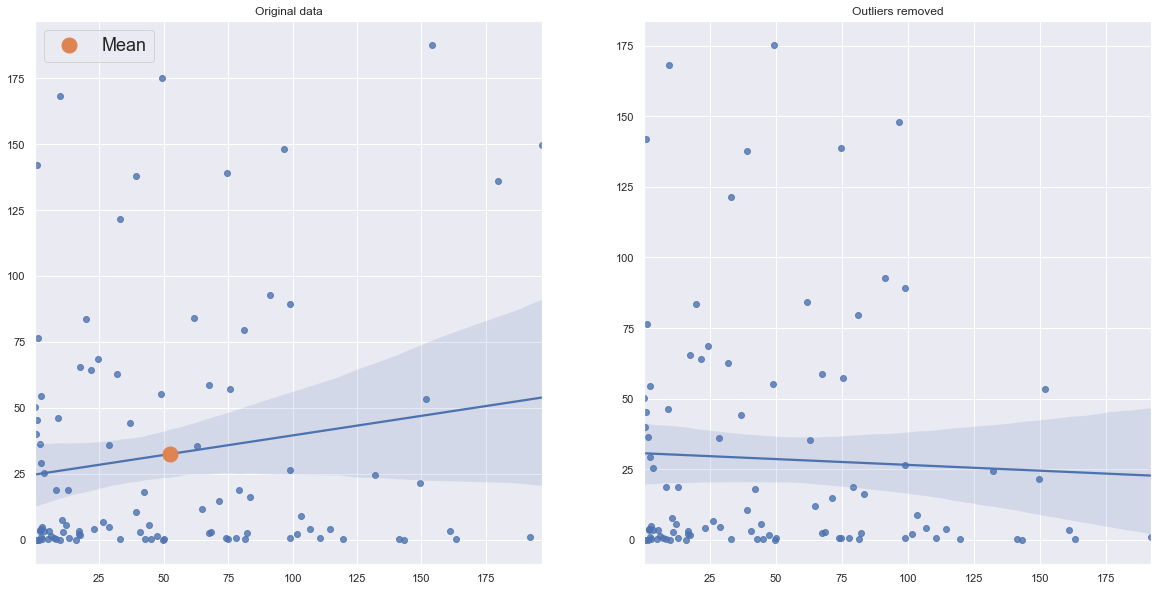

In [126]:
outliers = z_scores > distanceThreshold
variable1_without_outliers = variable1[~outliers]
variable2_without_outliers = variable2[~outliers]


fig, (ax0, ax1) = plt.subplots(1,2,figsize=(20,10))

sns.regplot(x=variable1, y=variable2, ax=ax0)
ax0.set_title("Original data")
ax0.plot(mean_variable_1, mean_variable_2, 'o', markersize=15, label="Mean")
ax0.legend(fontsize=18)


sns.regplot(x=variable1_without_outliers, y=variable2_without_outliers)
ax1.set_title("Outliers removed");

## 📒 Notebook
The link for the notebook can be found [here](https://github.com/nathanqueija/statistics/blob/master/1_descriptive_statistics/11_normalization_minmax.ipynb)